In [148]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import psycopg2 
import io
import matplotlib.pyplot as plt

In [30]:
# data directories
trail_info_df_list = !ls '/Users/briangraham/insight/trailrec/data/trail_info/'
trail_info_dir = '/Users/briangraham/insight/trailrec/data/trail_info/'

filename = trail_info_dir + trail_info_df_list[0]

In [65]:
# read in a single pickle file
df = pd.read_pickle(filename)
trail_info_dir = '/Users/briangraham/insight/trailrec/data/trail_info/'
df['trail_id'] = filename.replace('.pickle','').replace(trail_info_dir,'')

#convert from long to wide
df_row = df.pivot(index='trail_id',columns='label',values = 'value')
df_row.head()

label,Altitude change,Altitude end,Altitude max,Altitude min,Altitude start,Avg reverse time,Avg time,Bike type,Difficulty rating,Direction,...,city,climb,descent,description,distance,latitude,longitude,rating,state,votes
trail_id,,,,,,,,,,,,,,,,,,,,,
1-87-dh,"-1,508 ft",349 ft,"1,857 ft",349 ft,"1,857 ft",00:01:40,00:12:58,"DH, AM",Black Diamondrate,Downhill Primary,...,Duncan,6 ft,"-1,513 ft",Sustained steep and fast DH trail often used a...,2 miles,48.825920,-123.762540,Avg: 4.55,BC,13 votes


In [68]:
# function to do the above reformatting
def reformat_trail_data(filename):
    df = pd.read_pickle(filename)
    trail_info_dir = '/Users/briangraham/insight/trailrec/data/trail_info/'
    df['trail_id'] = filename.replace('.pickle','').replace(trail_info_dir,'')
    df_row = df.pivot(index='trail_id',columns='label',values = 'value')
    df_row.head()
    return df_row

In [77]:
# test concatentation
filename0 = trail_info_dir + trail_info_df_list[0]
filename1 = trail_info_dir + trail_info_df_list[1]
df1 = reformat_trail_data(filename0)
df2 = reformat_trail_data(filename1)
pd.concat([df1,df2],sort=True)

,Altitude change,Altitude end,Altitude max,Altitude min,Altitude start,Avg reverse time,Avg time,Bike type,Climb Difficulty,Difficulty rating,...,city,climb,descent,description,distance,latitude,longitude,rating,state,votes
trail_id,,,,,,,,,,,,,,,,,,,,,
1-87-dh,"-1,508 ft",349 ft,"1,857 ft",349 ft,"1,857 ft",00:01:40,00:12:58,"DH, AM",NaN,Black Diamondrate,...,Duncan,6 ft,"-1,513 ft",Sustained steep and fast DH trail often used a...,2 miles,48.825920,-123.762540,Avg: 4.55,BC,13 votes
10-50,-84 ft,818 ft,904 ft,772 ft,901 ft,00:11:07,00:10:24,XC,Green,Greenrate,...,Nanaimo,90 ft,-174 ft,NaN,"4,345 ft",49.099020,-123.996000,Avg: 3.5,BC,8 votes


# Combine trail info pickles into single df

In [91]:
# scrape the data from all pickles
df_list = []
for path in trail_info_df_list:
    filename = trail_info_dir + path
    df = reformat_trail_data(filename)
    df_list.append(df)

In [92]:
# concat all dataframes
df_trail_info_combined = pd.concat(df_list, sort = False)

In [93]:
# save pickle
df_trail_info_combined.to_pickle('/Users/briangraham/insight/trailrec/data/trail_info_combined.pickle')

In [191]:
df_trail_info_combined.head()

,Altitude change,Altitude end,Altitude max,Altitude min,Altitude start,Avg reverse time,Avg time,Bike type,Difficulty rating,Direction,...,Distance flat,Family Friendly,Year Opened,Season,AKA,Land Manager,Voted Difficulty,eBike Allowed,OSM Way,Alpine Trail
trail_id,,,,,,,,,,,,,,,,,,,,,
1-87-dh,"-1,508 ft",349 ft,"1,857 ft",349 ft,"1,857 ft",00:01:40,00:12:58,"DH, AM",Black Diamondrate,Downhill Primary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-50,-84 ft,818 ft,904 ft,772 ft,901 ft,00:11:07,00:10:24,XC,Greenrate,Both Directions,...,221 ft,Yes,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-dollar,-191 ft,"2,446 ft","2,636 ft","2,446 ft","2,636 ft",00:15:47,00:09:03,"DH, AM, XC",Bluerate,NaN,...,76 ft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-km,-694 ft,"4,931 ft","5,625 ft","4,918 ft","5,625 ft",NaN,00:06:44,DH,Black Diamondrate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-licks,135 ft,750 ft,797 ft,614 ft,614 ft,NaN,00:18:47,"AM, XC",Bluerate,NaN,...,151 ft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Summary of trail info

In [142]:
percent_missing = df_trail_info_combined.isnull().sum()/df_trail_info_combined.shape[0]*100
observations = df_trail_info_combined.notnull().sum()
trail_info_observation_stats = pd.DataFrame({'observations':observations,'percent_missing':percent_missing})
trail_info_observation_stats

,observations,percent_missing
Altitude change,3920,0.381194
Altitude end,3935,0.000000
Altitude max,3642,7.445997
Altitude min,3935,0.000000
Altitude start,3935,0.000000
Avg reverse time,2055,47.776366
Avg time,3642,7.445997
Bike type,3465,11.944091
Difficulty rating,3935,0.000000
Direction,1303,66.886912


Text(0.5,1,'Word counts for trail descriptions')

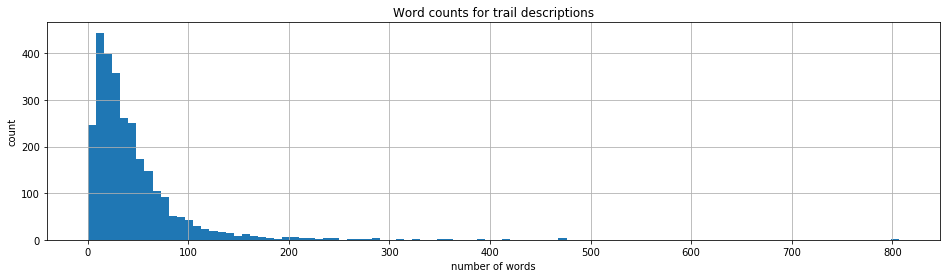

In [221]:
# Amount of words in descriptions
# 28% of ~4k files were missing descriptions
description_length = df_trail_info_combined['description'].str.len()
description_length = df_trail_info_combined['description'].str.count(' ')
description_length.hist(bins = 100,figsize=(16,4))
plt.xlabel('number of words')
plt.ylabel('count')
plt.title('Word counts for trail descriptions')

# Combine trail comment pickles into single df

In [226]:
# test trail comment loading code
trail_comments_df_list = !ls '/Users/briangraham/insight/trailrec/data/comments/'
trail_comments_dir = '/Users/briangraham/insight/trailrec/data/comments/'
filename = trail_comments_dir + trail_comments_df_list[10]
df = pd.read_pickle(filename)
if not(df.empty):
    df['trail_id'] = filename.replace('.pickle','').replace(trail_comments_dir,'')
    df.set_index('trail_id',inplace=True)
df.head()

,comment_votes,user,comment_text
trail_id,,,
2-3481,+ 0,atfarley,Just a road


In [227]:
# functionalize trail comment read in
def reformat_comment_data(filename):
    df = pd.read_pickle(filename)
    if not(df.empty):
        trail_comments_dir = '/Users/briangraham/insight/trailrec/data/comments/'
        df['trail_id'] = filename.replace('.pickle','').replace(trail_comments_dir,'')
        df.set_index('trail_id',inplace=True)
    return(df)

In [233]:
df_comment_list = []
for path in trail_comments_df_list:
    filename = trail_comments_dir + path
    df = reformat_comment_data(filename)
    df_comment_list.append(df)

In [234]:
df_comment_info_combined = pd.concat(df_comment_list, sort = False)
df_comment_info_combined.head()

,comment_votes,user,comment_text
19th-hole,+ 1,blackcombterry,What's 19th Hole like below the Upper Legacy c...
2-3481,+ 0,atfarley,Just a road
2001,+ 1,amowat,Still some good ladders but alot gone. Big roc...
2001,+ 0,MtbSince84,Closed due to logging.
280-s,+ 0,HexAngel,Gently insistent ascent even this unfit geezer...


In [239]:
# save pickle
df_comment_info_combined.index.name = 'trail_id'
df_comment_info_combined.to_pickle('/Users/briangraham/insight/trailrec/data/trail_comments_combined.pickle')

In [240]:
df_comment_info_combined.shape

(1848, 3)

Text(0.5,1,'Distribution of number of comments')

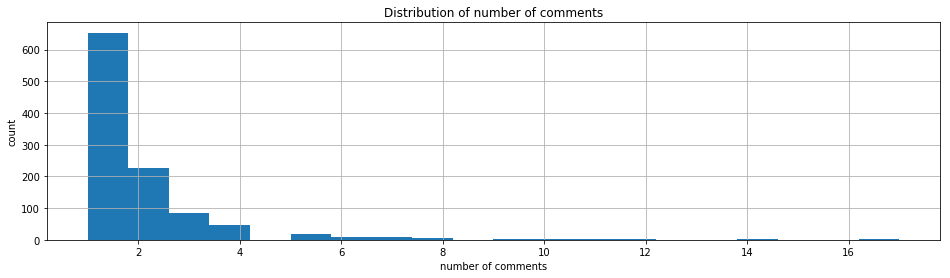

In [248]:
comment_count = df_comment_info_combined.groupby('trail_id').count()
comment_count['comment_text'].hist(bins = 20,figsize=(16,4))
plt.xlabel('number of comments')
plt.ylabel('count')
plt.title('Distribution of number of comments')

In [246]:
comment_count.shape[0]

1054

### ~ 1/4 of trails have comments

# Combine Ridelogs 

In [256]:
# test trail ridelog loading code
trail_ridelogs_df_list = !ls '/Users/briangraham/insight/trailrec/data/ridelogs/'
trail_ridelogs_dir = '/Users/briangraham/insight/trailrec/data/ridelogs/'
filename = trail_ridelogs_dir + trail_ridelogs_df_list[10]
df = pd.read_pickle(filename)
if not(df.empty):
    df['trail_id'] = filename.replace('.pickle','').replace(trail_ridelogs_dir,'')
    df.set_index('trail_id',inplace=True)
df.head()

,ride_date,rider_url,rider_name,rider_state,rider_city,ride_difficulty_string
trail_id,,,,,,
142-to-rc-connector,Sep 15,https://www.trailforks.com/profile/skyzorg/,skyzorg,BC,Nanaimo,Very Difficult / Black Diamond
142-to-rc-connector,Sep 2,https://www.trailforks.com/profile/blairreid/,blairreid,BC,Nanaimo,Very Difficult / Black Diamond
142-to-rc-connector,Jul 7,https://www.trailforks.com/profile/duttonr/,duttonr,BC,Nanaimo,Very Difficult / Black Diamond
142-to-rc-connector,Jul 1,https://www.trailforks.com/profile/Dmac69/,Dmac69,BC,Nanaimo,Very Difficult / Black Diamond
142-to-rc-connector,Jun 28,https://www.trailforks.com/profile/AlexBjork/,AlexBjork,BC,Nanaimo,Very Difficult / Black Diamond


In [259]:
# functionalize trail ridelog read in
def reformat_ridelogs_data(filename):
    df = pd.read_pickle(filename)
    if not(df.empty):
        trail_ridelogs_dir = '/Users/briangraham/insight/trailrec/data/ridelogs/'
        df['trail_id'] = filename.replace('.pickle','').replace(trail_ridelogs_dir,'')
        df.set_index('trail_id',inplace=True)
    return(df)

In [260]:
df_ridelogs_list = []
for path in trail_ridelogs_df_list:
    filename = trail_ridelogs_dir + path
    df = reformat_ridelogs_data(filename)
    df_ridelogs_list.append(df)

In [261]:
df_ridelogs_info_combined = pd.concat(df_ridelogs_list, sort = False)
df_ridelogs_info_combined.head()

,ride_date,rider_url,rider_name,rider_state,rider_city,ride_difficulty_string
1-87-dh,Jul 5,https://www.trailforks.com/profile/BCpov/,BCpov,BC,Duncan,Very Difficult / Black Diamond
1-87-dh,Jul 5,https://www.trailforks.com/profile/canadaka/,canadaka,BC,Duncan,Very Difficult / Black Diamond
1-87-dh,May 27,https://www.trailforks.com/profile/campasternak/,campasternak,BC,Duncan,Very Difficult / Black Diamond
1-87-dh,May 21,https://www.trailforks.com/profile/campasternak/,campasternak,BC,Duncan,Very Difficult / Black Diamond
1-87-dh,May 20,https://www.trailforks.com/profile/superlightr...,superlightracer,BC,Duncan,Very Difficult / Black Diamond


In [289]:
# save pickle
df_ridelogs_info_combined.index.name = 'trail_id'
ridelogs_match = df_ridelogs_info_combined.join(df_trail_info_combined,how='right')
ridelogs_match = ridelogs_match[['ride_date','rider_url','rider_name','rider_state','rider_city','ride_difficulty_string']]
ridelogs_match.to_pickle('/Users/briangraham/insight/trailrec/data/trail_ridelogs_combined.pickle')

In [290]:
ridelogs_match.shape

(1589860, 6)

In [285]:
ridelog_count = ridelogs_match.groupby('trail_id').count()
ridelog_count.head()
ridelog_count.shape

(3935, 50)

Text(0.5,1,'Distribution of number of number of rides per trail')

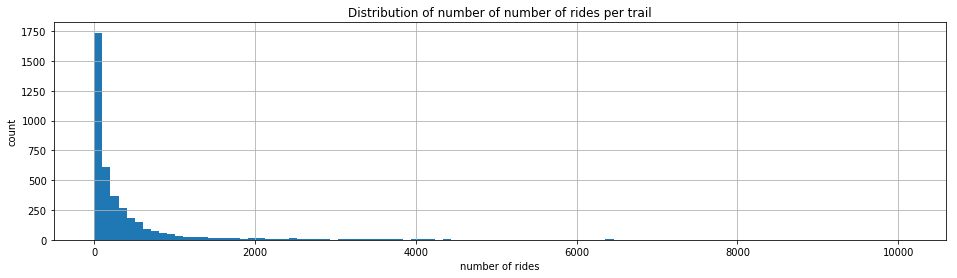

In [286]:
ridelog_count['ride_date'].hist(bins = 100,figsize=(16,4))
plt.xlabel('number of rides')
plt.ylabel('count')
plt.title('Distribution of number of number of rides per trail')

Text(0.5,1,'Distribution of number of number of rides per trail')

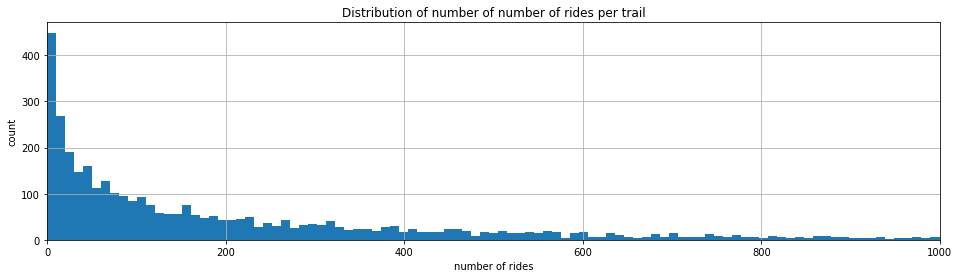

In [287]:
ridelog_count['ride_date'].hist(bins = 1000,figsize=(16,4))
plt.xlabel('number of rides')
plt.ylabel('count')
plt.xlim([0,1000])
plt.title('Distribution of number of number of rides per trail')

In [288]:
conn = psycopg2.connect("host=localhost dbname=postgres user=postgres")
cur = conn.cursor()